Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset 

In [2]:
data1 = pd.read_excel(r"C:\Users\user\Downloads\Country-Code.xlsx")

In [3]:
data2 = pd.read_csv(r"C:\Users\user\Downloads\zomato.csv",encoding='ISO-8859-1')

In [4]:
data1.head(30)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
data2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
missing_cuisines = data2[data2['Cuisines'].isna()]
mode_cuisine = data2['Cuisines'].mode()[0]
data2['Cuisines'].fillna(mode_cuisine, inplace=True)
print("Number of missing values in 'Cuisines' after imputation:", data2['Cuisines'].isna().sum())

Number of missing values in 'Cuisines' after imputation: 0


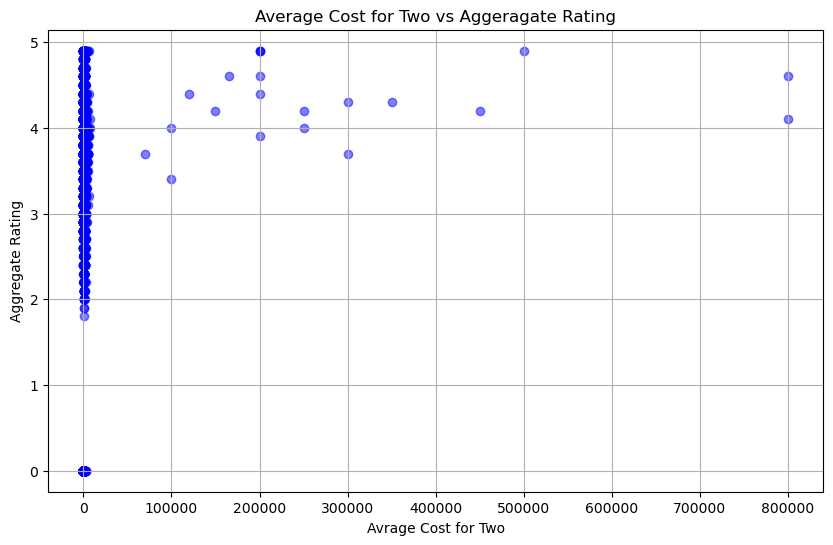

In [9]:
average_cost = data2['Average Cost for two']
aggregate_rating = data2['Aggregate rating']
plt.figure(figsize=(10,6))
plt.scatter(average_cost,aggregate_rating,color='blue',alpha=0.5)
plt.title('Average Cost for Two vs Aggeragate Rating')
plt.xlabel('Avrage Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

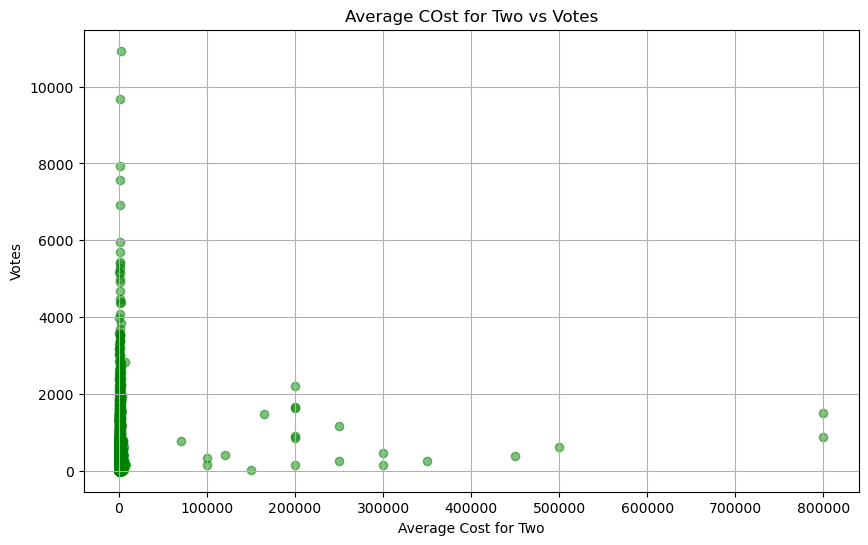

In [10]:
average_cost = data2['Average Cost for two']
votes = data2['Votes']
plt.figure(figsize=(10,6))
plt.scatter(average_cost,votes,color='green',alpha=0.5)
plt.title('Average COst for Two vs Votes')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

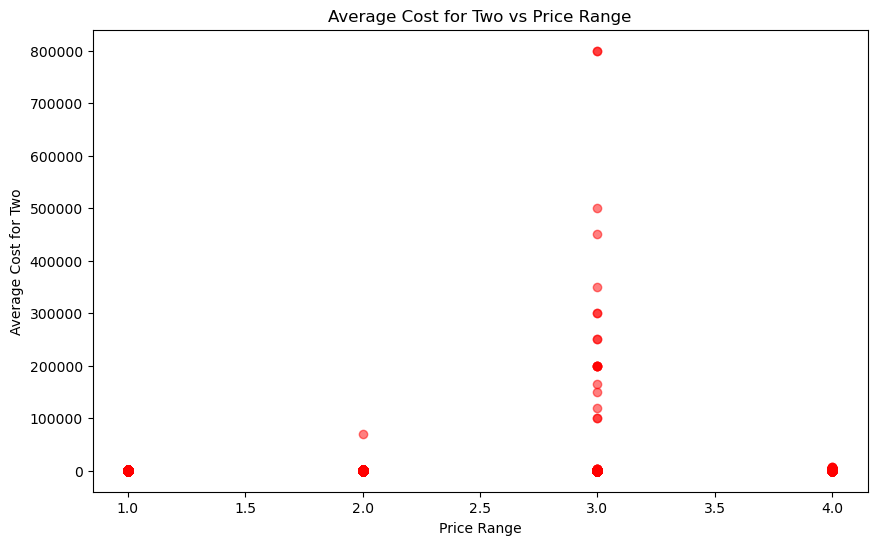

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x='Price range',y='Average Cost for two',data=data2,color='red',alpha=0.5)
plt.title('Average Cost for Two vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()

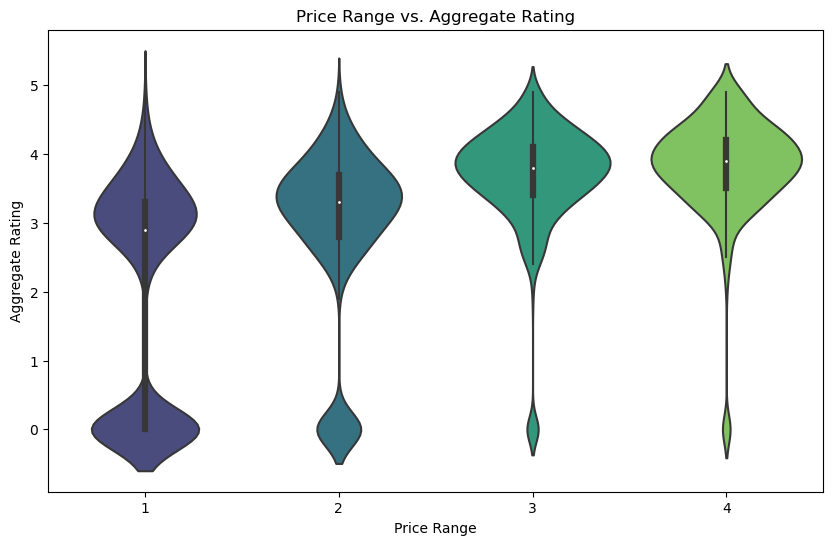

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Price range', y='Aggregate rating', data=data2, palette='viridis')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

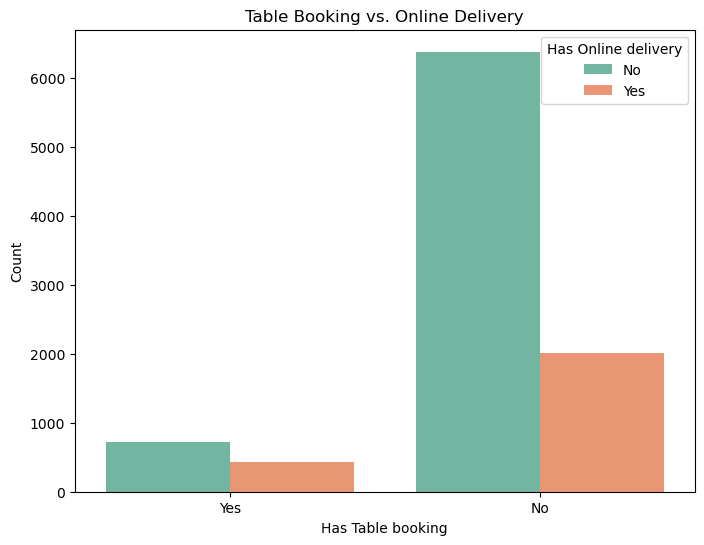

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Has Table booking', hue='Has Online delivery', data=data2, palette='Set2')
plt.title('Table Booking vs. Online Delivery')
plt.xlabel('Has Table booking')
plt.ylabel('Count')
plt.legend(title='Has Online delivery')
plt.show()

([<matplotlib.patches.Wedge at 0x1aed4a327d0>,
 [Text(0.7335674636606228, 0.819682119030616, 'North Indian'),
  Text(-0.5893433631658553, 0.9288026702655193, 'North Indian, Chinese'),
  Text(-1.0695669205605947, 0.25695642129070567, 'Chinese'),
  Text(-1.0156578084359724, -0.42242066256640176, 'Fast Food'),
  Text(-0.5885167416932667, -0.9293266620229621, 'North Indian, Mughlai'),
  Text(-0.001468010939087877, -1.0999990204286014, 'Cafe'),
  Text(0.4870112613457864, -0.9863163951402139, 'Bakery'),
  Text(0.8101505161499852, -0.7440807356610658, 'North Indian, Mughlai, Chinese'),
  Text(1.0060114877036386, -0.44490548053301426, 'Bakery, Desserts'),
  Text(1.0903483121505928, -0.14539793048855149, 'Street Food')],
 [Text(0.4001277074512487, 0.44709933765306326, '26.76%'),
  Text(-0.32146001627228465, 0.5066196383266469, '14.47%'),
  Text(-0.5834001384875971, 0.14015804797674855, '10.03%'),
  Text(-0.553995168237803, -0.23041127049076454, '10.03%'),
  Text(-0.3210091318326909, -0.50690545

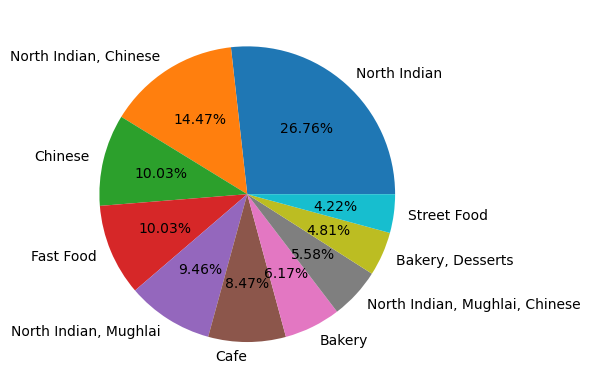

In [14]:
plt.pie(data2['Cuisines'].value_counts().values[:10], labels=data2['Cuisines'].value_counts().index[:10],autopct='%1.2f%%')

In [15]:
data = pd.merge(data1,data2, on='Country Code',how='inner')
print(data)

      Country Code        Country  Restaurant ID  \
0                1          India        3400025   
1                1          India        3400341   
2                1          India        3400005   
3                1          India        3400021   
4                1          India        3400017   
...            ...            ...            ...   
9546           216  United States       17697389   
9547           216  United States       17697424   
9548           216  United States       17697332   
9549           216  United States       17694056   
9550           216  United States       17559793   

                               Restaurant Name            City  \
0                                   Jahanpanah            Agra   
1                          Rangrezz Restaurant            Agra   
2                      Time2Eat - Mama Chicken            Agra   
3        Chokho Jeeman Marwari Jain Bhojanalya            Agra   
4                               Pinch Of Spic

In [16]:
data.drop(['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose'],axis=1)

,Country,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,India,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,India,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,India,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,India,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,United States,-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,United States,-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,United States,-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [17]:
from sklearn.preprocessing import LabelEncoder
object_cols = data.select_dtypes(include=['object']).columns
encoder=LabelEncoder()
for col in object_cols:
    data[col] = encoder.fit_transform(data[col])
    
print(data)

      Country Code  Country  Restaurant ID  Restaurant Name  City  Address  \
0                1        3        3400025             3201     1     4553   
1                1        3        3400341             5261     1     4605   
2                1        3        3400005             6919     1     6234   
3                1        3        3400021             1637     1      100   
4                1        3        3400017             4922     1     1316   
...            ...      ...            ...              ...   ...      ...   
9546           216       14       17697389             6794   135     1279   
9547           216       14       17697424             6839   135     2667   
9548           216       14       17697332             6945   135      957   
9549           216       14       17694056             6883   136     1910   
9550           216       14       17559793             2342   138      962   

      Locality  Locality Verbose   Longitude   Latitude  ...  C

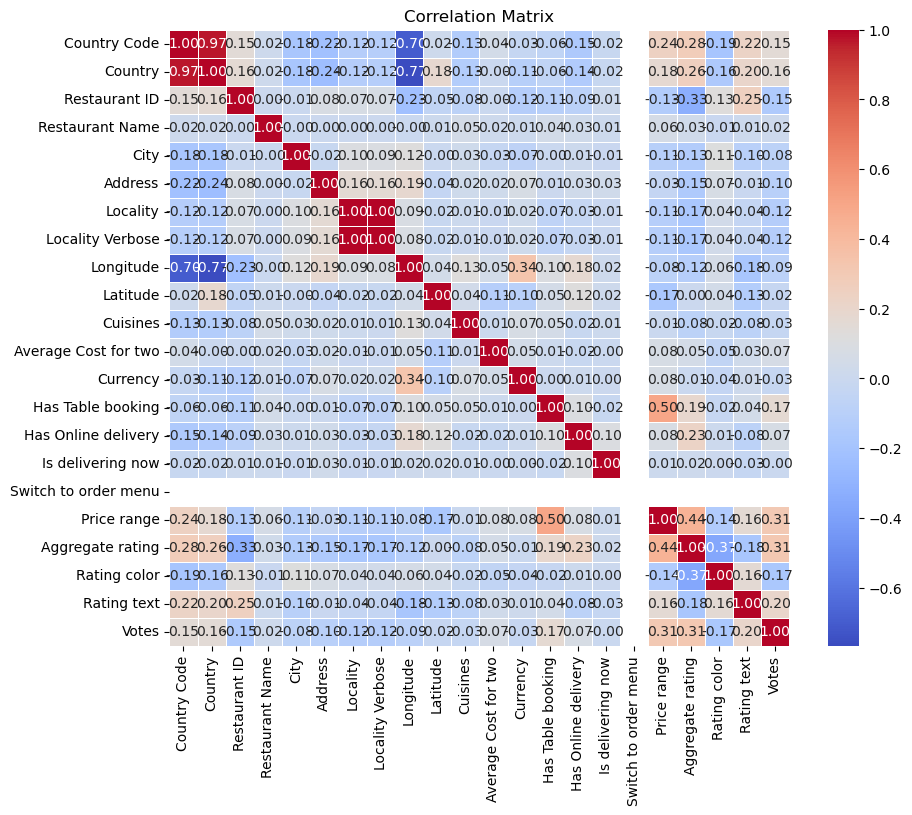

In [18]:
corr_mat = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# creating a model to predict Price Range
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [20]:
x = data.drop('Price range',axis=1)
y = data['Price range']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
model = DecisionTreeClassifier(random_state=100)

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [24]:
y_pred = model.predict(x_test)

In [25]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('\nClassification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9727891156462585

Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       877
           2       0.97      0.98      0.97       640
           3       0.93      0.91      0.92       281
           4       0.91      0.93      0.92       113

    accuracy                           0.97      1911
   macro avg       0.95      0.95      0.95      1911
weighted avg       0.97      0.97      0.97      1911



In [26]:
# Creating a model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
data.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,3400025,3201,1,4553,17,17,78.011544,27.161661,...,4,0,0,0,0,3,3.9,5,2,140
1,1,3,3400341,5261,1,4605,17,17,0.000000,0.000000,...,4,0,0,0,0,2,3.5,5,2,71
2,1,3,3400005,6919,1,6234,17,17,78.011608,27.160832,...,4,0,0,0,0,2,3.6,5,2,94
3,1,3,3400021,1637,1,100,204,205,77.998092,27.195928,...,4,0,0,0,0,2,4.0,1,5,87
4,1,3,3400017,4922,1,1316,204,205,78.007553,27.201725,...,4,0,0,0,0,3,4.2,1,5,177


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   int32  
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   int32  
 4   City                  9551 non-null   int32  
 5   Address               9551 non-null   int32  
 6   Locality              9551 non-null   int32  
 7   Locality Verbose      9551 non-null   int32  
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   int32  
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   int32  
 13  Has Table booking     9551 non-null   int32  
 14  Has Online delivery   9551 non-null   int32  
 15  Is delivering now    

In [29]:
x = data.drop('Average Cost for two',axis=1)
y = data['Average Cost for two']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 167387606.8516195
R-squared Score: 0.06170694553062084


In [34]:
# Creating a different model 
from sklearn.ensemble import RandomForestRegressor

In [35]:
model = RandomForestRegressor(random_state=100)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=100)

In [36]:
y_pred = model.predict(x_test)

In [37]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Mean Squared Error: 98910171.60194881
R-squared Score: 0.4455579551193931
